EAE3709 Aplicaciones de Machine Learning en Economía <br>
Primer Semestre 2025

Instituto de Economía<br>
Pontificia Universidad Católica de Chile
# Proyecto Final: ¿Es posible predecir si un estudiante de enseñanza media (3°/ 4° medio) en Chile abandonará el sistema escolar antes de completar su educación utilizando algoritmos de machine learning?
- Autores:
    - Diana Adco  [<diana.adco97@uc.cl>]
    - Xiomara Kuwae  [<xmkuwae@uc.cl>]
    - Luis J López  [<luis.laureano@uc.cl>]
  
- Fecha: [30/6/2025]
__________________________________________________________

# Descripción del proyecto
La deserción escolar en la educación media continúa siendo un desafío significativo para el sistema educativo chileno, representando un factor determinante en la reproducción de desigualdades sociales. Mientras las estadísticas oficiales muestran avances en la cobertura educacional, los últimos años de enseñanza media (3° y 4°) siguen presentando tasas preocupantes de abandono, especialmente tras los efectos disruptivos de la pandemia COVID-19. El objetivo de este trabajo es desarrollar modelos de machine learning en un contexto de aprendizaje supervisado para determinar si es posible predecir qué estudiantes de 3° y 4° medio están en riesgo de abandonar el sistema escolar antes de completar su educación, basándonos en patrones de asistencia, rendimiento académico y factores socioeducativos, a partir de datos del sistema educacional chileno recopilados entre 2016 y 2024.

# Contenido
0. [Creación de bases](#seccion0)
1. [Pre-procesamiento](#seccion1)
2. [Análisis Exploratorio de Datos (EDA](#seccion2)
3. [Feature Engineering](#seccion3)
4. [Entrenamiento](#seccion4)
5. [Evaluación](#seccion5)
__________________________________________________________

# 0. Creación de bases <a name="seccion0"></a>

**Creación de bases 2016-2024**

Esta sección se incluyó como transparencia de como se crearon los csv que en la siguiente parte se leerán de Github, por eso las siguientes líneas leen de nuestros repositorios pero no son necesarias correrlas para iniciar el trabajo.

Los csv "20250212_Rendimiento_2024_20250131_WEB" y "20241122_Preferentes_Prioritarios_y_Beneficiarios_2024_20241130_PUBL_MRUN", etc. son los archivos originales publicados por MINEDUC (sacados de las carpetas zip) desde su página web  (https://datosabiertos.mineduc.cl/) para los años correspondientes.

In [ ]:
# Cargamos las librerías a utilizar
import pandas as pd

In [ ]:
# Cargamos la base de rendimiento 2024
df5 = pd.read_csv(r'/Users/xiomarakuwae/Downloads/Proyecto AMLE/20250212_Rendimiento_2024_20250131_WEB.csv', sep=';')

# Nos quedamos solo con observaciones para jóvenes (se elimina educación especial y adultos)
df5 = df5[~df5['COD_ENSE'].isin([110, 165, 167, 211, 212, 213, 214, 215, 216, 217, 218, 219, 299])]

# Nos quedamos solo con observaciones de 3° y 4° medio
df5 = df5[df5['COD_GRADO'].isin([2, 3, 4])]

# Se guarda como un nuevo csv que estará subido en Github
df5.to_csv('2024_Rendimiento_filtrado.csv', index=False)

# Cargamos la base de preferentes 2024
df2 = pd.read_csv(r'/Users/xiomarakuwae/Downloads/Proyecto AMLE/20241122_Preferentes_Prioritarios_y_Beneficiarios_2024_20241130_PUBL_MRUN.csv' , sep=';')

# Eliminamos los valores en blanco
df2 = df2[df2['COD_ENSE'] != ' ']

# Cambiamos COD_ENSE a un número entero
df2['COD_ENSE'] = df2['COD_ENSE'].astype(int)

# Nos quedamos solo con observaciones para jóvenes (se elimina educación especial y adultos)
df2 = df2[df2['COD_ENSE'].isin([310, 410, 510, 610, 710, 810, 910])]

# Eliminamos los valores en blanco
df2 = df2[df2['COD_GRADO'] != ' ']

# Cambiamos COD_GRADO a un número entero
df2['COD_GRADO'] = df2['COD_GRADO'].astype(int)

# Nos quedamos solo con observaciones de 3° y 4° medio
df2 = df2[df2['COD_GRADO'].isin([3, 4])]

# Se guarda como un nuevo csv que estará subido en Github
df2.to_csv('2024_SEP_filtrado.csv', index=False)

# Se repite el proceso para 2023  ////////////////////////////////////////////
%reset -f
df4 = pd.read_csv(r'/Users/xiomarakuwae/Downloads/Proyecto AMLE/20240209_Rendimiento_2023_20240131_WEB.csv', sep=';')
df4 = df4[~df4['COD_ENSE'].isin([110, 165, 167, 211, 212, 213, 214, 215, 216, 217, 218, 219, 299])]
df4 = df4[df4['COD_GRADO'].isin([2, 3, 4])]
df4.to_csv('2023_Rendimiento_filtrado.csv', index=False)

df2 = pd.read_csv(r'/Users/xiomarakuwae/Downloads/Proyecto AMLE/20231211_Preferentes_Prioritarios_y_Beneficiarios_2023_20231130_WEB.csv' , sep=';')
df2 = df2[df2['COD_ENSE'] != ' ']
df2['COD_ENSE'] = df2['COD_ENSE'].astype(int)
df2 = df2[df2['COD_ENSE'].isin([310, 410, 510, 610, 710, 810, 910])]
df2 = df2[df2['COD_GRADO'] != ' ']
df2['COD_GRADO'] = df2['COD_GRADO'].astype(int)
df2 = df2[df2['COD_GRADO'].isin([3, 4])]
df2.to_csv('2023_SEP_filtrado.csv', index=False)

# Se repite el proceso para 2022 ////////////////////////////////////////////
%reset -f
df3 = pd.read_csv(r'/Users/xiomarakuwae/Downloads/Proyecto AMLE/20230209_Rendimiento_2022_20230131_WEB.csv', sep=';')
df3 = df3[~df3['COD_ENSE'].isin([110, 165, 167, 211, 212, 213, 214, 215, 216, 217, 218, 219, 299])]
df3 = df3[df3['COD_GRADO'].isin([2, 3, 4])]
df3.to_csv('2022_Rendimiento_filtrado.csv', index=False)

df2 = pd.read_csv(r'/Users/xiomarakuwae/Downloads/Proyecto AMLE/20221216_Preferentes_Prioritarios_y_Beneficiarios_2022_20221130_WEB.csv', sep=';')
df2 = df2[df2['COD_ENSE'] != ' ']
df2['COD_ENSE'] = df2['COD_ENSE'].astype(int)
df2 = df2[df2['COD_ENSE'].isin([310, 410, 510, 610, 710, 810, 910])]
df2 = df2[df2['COD_GRADO'] != ' ']
df2['COD_GRADO'] = df2['COD_GRADO'].astype(int)
df2 = df2[df2['COD_GRADO'].isin([3, 4])]
df2.to_csv('2022_SEP_filtrado.csv', index=False)

# Se repite el proceso para 2021  ////////////////////////////////////////////
%reset -f
df2 = pd.read_csv(r'/Users/xiomarakuwae/Downloads/Proyecto AMLE/20220302_Rendimiento_2021_20220131_WEB.csv', sep=';')
df2 = df2[~df2['COD_ENSE'].isin([110, 165, 167, 211, 212, 213, 214, 215, 216, 217, 218, 219, 299])]
df2 = df2[df2['COD_GRADO'].isin([2, 3, 4])]
df2.to_csv('2021_Rendimiento_filtrado.csv', index=False)

df2 = pd.read_csv(r'/Users/xiomarakuwae/Downloads/Proyecto AMLE/20211229_Preferentes_Prioritarios_y_Beneficiarios_2021_20211126_WEB.csv', sep=';')
df2 = df2[df2['COD_ENSE'] != ' ']
df2['COD_ENSE'] = df2['COD_ENSE'].astype(int)
df2 = df2[df2['COD_ENSE'].isin([310, 410, 510, 610, 710, 810, 910])]
df2 = df2[df2['COD_GRADO'] != ' ']
df2['COD_GRADO'] = df2['COD_GRADO'].astype(int)
df2 = df2[df2['COD_GRADO'].isin([3, 4])]
df2.to_csv('2021_SEP_filtrado.csv', index=False)

# Se repite el proceso para 2020 ////////////////////////////////////////////
%reset -f
df1 = pd.read_csv(r'/Users/xiomarakuwae/Downloads/Proyecto AMLE/20210223_Rendimiento_2020_20210131_WEB.csv', sep=';')
df1 = df1[~df1['COD_ENSE'].isin([110, 165, 167, 211, 212, 213, 214, 215, 216, 217, 218, 219, 299])]
df1 = df1[df1['COD_GRADO'].isin([2, 3, 4])]
df1.to_csv('2020_Rendimiento_filtrado.csv', index=False)

df2 = pd.read_csv(r'/Users/xiomarakuwae/Downloads/Proyecto AMLE/20201209_Preferentes_Prioritarios_y_Beneficiarios_2020_20201126_WEB.csv', sep=';')
df2 = df2[df2['COD_ENSE'] != ' ']
df2['COD_ENSE'] = df2['COD_ENSE'].astype(int)
df2 = df2[df2['COD_ENSE'].isin([310, 410, 510, 610, 710, 810, 910])]
df2 = df2[df2['COD_GRADO'] != ' ']
df2['COD_GRADO'] = df2['COD_GRADO'].astype(int)
df2 = df2[df2['COD_GRADO'].isin([3, 4])]
df2.to_csv('2020_SEP_filtrado.csv', index=False)

# Se repite el proceso para 2019 ////////////////////////////////////////////
%reset -f
df1 = pd.read_csv(r'/Users/xiomarakuwae/Downloads/Proyecto AMLE/20200220_Rendimiento_2019_20200131_PUBL.csv', sep=';')
df1 = df1[~df1['COD_ENSE'].isin([110, 165, 167, 211, 212, 213, 214, 215, 216, 217, 218, 219, 299])]
df1 = df1[df1['COD_GRADO'].isin([2, 3, 4])]
df1.to_csv('2019_Rendimiento_filtrado.csv', index=False)
df2 = pd.read_csv(r'/Users/xiomarakuwae/Downloads/Proyecto AMLE/20191122_Preferentes_Prioritarios_y_Beneficiarios_2019_20191106_PUBL.csv', sep=';')

df2 = df2[df2['COD_ENSE'] != ' ']
df2['COD_ENSE'] = df2['COD_ENSE'].astype(int)
df2 = df2[df2['COD_ENSE'].isin([310, 410, 510, 610, 710, 810, 910])]
df2 = df2[df2['COD_GRADO'] != ' ']
df2['COD_GRADO'] = df2['COD_GRADO'].astype(int)
df2 = df2[df2['COD_GRADO'].isin([3, 4])]
df2.to_csv('2019_SEP_filtrado.csv', index=False)

# Se repite el proceso para 2018 ////////////////////////////////////////////
%reset -f
df1 = pd.read_csv(r'/Users/xiomarakuwae/Downloads/Proyecto AMLE/20190220_Rendimiento_2018_20190131_PUBL.csv', sep=';')
df1 = df1[~df1['COD_ENSE'].isin([110, 165, 167, 211, 212, 213, 214, 215, 216, 217, 218, 219, 299])]
df1 = df1[df1['COD_GRADO'].isin([2, 3, 4])]
df1.to_csv('2018_Rendimiento_filtrado.csv', index=False)

df2 = pd.read_csv(r'/Users/xiomarakuwae/Downloads/Proyecto AMLE/20181211_Preferentes_Prioritarios_y_Beneficiarios_2018_20181106_PUBL.csv', sep=';')
df2 = df2[df2['COD_ENSE'] != ' ']
df2['COD_ENSE'] = df2['COD_ENSE'].astype(int)
df2 = df2[df2['COD_ENSE'].isin([310, 410, 510, 610, 710, 810, 910])]
df2 = df2[df2['COD_GRADO'] != ' ']
df2['COD_GRADO'] = df2['COD_GRADO'].astype(int)
df2 = df2[df2['COD_GRADO'].isin([3, 4])]
df2.to_csv('2018_SEP_filtrado.csv', index=False)

# Se repite el proceso para 2017 ////////////////////////////////////////////
%reset -f
df1 = pd.read_csv(r'/Users/xiomarakuwae/Downloads/Proyecto AMLE/20180213_Rendimiento_2017_20180131_PUBL.csv', sep=';')
df1 = df1[~df1['cod_ense'].isin([110, 165, 167, 211, 212, 213, 214, 215, 216, 217, 218, 219, 299])]
df1['cod_ense'] = df1['cod_ense'].astype(int)
df1 = df1[df1['cod_grado'].isin([2, 3, 4])]
df1.to_csv('2017_Rendimiento_filtrado.csv', index=False)

df2 = pd.read_csv(r'/Users/xiomarakuwae/Downloads/Proyecto AMLE/Preferentes_Prioritarios_y_Beneficiarios_2017_20171030_PUBL.csv', sep=';')
df2 = df2[df2['COD_ENSE'] != ' ']
df2['COD_ENSE'] = df2['COD_ENSE'].astype(int)
df2 = df2[df2['COD_ENSE'].isin([310, 410, 510, 610, 710, 810, 910])]
df2 = df2[df2['COD_GRADO'] != ' ']
df2['COD_GRADO'] = df2['COD_GRADO'].astype(int)
df2 = df2[df2['COD_GRADO'].isin([3, 4])]
df2.to_csv('2017_SEP_filtrado_filtrado.csv', index=False)

# Agregamos la base "Rendimiento" de 2016, para extraer el dato de promedio general anual.
%reset -f
df1 = pd.read_csv(r'/Users/xiomarakuwae/Downloads/Proyecto AMLE/20170216_Rendimiento_2016_20170131_PUBL.csv', sep=';')
df1 = df1[~df1['cod_ense'].isin([110, 165, 167, 211, 212, 213, 214, 215, 216, 217, 218, 219, 299])]
df1['cod_ense'] = df1['cod_ense'].astype(int)
df1 = df1[df1['cod_grado'].isin([3, 4])]
df1.to_csv('2016_Rendimiento_filtrado.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/xiomarakuwae/Downloads/Proyecto AMLE/20250212_Rendimiento_2024_20250131_WEB.csv'

In [ ]:
# Creamos el df de muestra para enviar con la tarea, teniendo 10mil observaciones
muestra = df.sample(n=1000)
muestra.to_csv('Proy_muestra.csv', index=False)
from google.colab import files
files.download('Proy_muestra.csv')

# 1. Pre-procesamiento <a name="seccion1"></a>
Incluir en esta sección:
- Importación de librerías principales
- Carga del data frame
- Integración con otros sets de datos (si aplica)
- Descripción inicial de las columnas:
    - tipo de datos
    - evaluar presencia de missings y outliers
- Construcción de la variable objetivo o target (si aplica)

In [40]:
# Cargamos las librerías a utilizar
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Traemos las tablas de rendimiento**

In [41]:
# Cargamos los datos de cada año en un dataframe independiente
df1 = pd.read_csv('https://raw.githubusercontent.com/luijolo/Machine-Learning/refs/heads/main/Trabajo%20final/2024_Rendimiento_filtrado.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/luijolo/Machine-Learning/refs/heads/main/Trabajo%20final/2023_Rendimiento_filtrado.csv')
df3 = pd.read_csv('https://raw.githubusercontent.com/luijolo/Machine-Learning/refs/heads/main/Trabajo%20final/2022_Rendimiento_filtrado.csv')
df4 = pd.read_csv('https://raw.githubusercontent.com/luijolo/Machine-Learning/refs/heads/main/Trabajo%20final/2021_Rendimiento_filtrado.csv')
df5 = pd.read_csv('https://raw.githubusercontent.com/luijolo/Machine-Learning/refs/heads/main/Trabajo%20final/2020_Rendimiento_filtrado.csv')
df6 = pd.read_csv('https://raw.githubusercontent.com/luijolo/Machine-Learning/refs/heads/main/Trabajo%20final/2019_Rendimiento_filtrado.csv')
df7 = pd.read_csv('https://raw.githubusercontent.com/luijolo/Machine-Learning/refs/heads/main/Trabajo%20final/2018_Rendimiento_filtrado.csv')
df8 = pd.read_csv('https://raw.githubusercontent.com/luijolo/Machine-Learning/refs/heads/main/Trabajo%20final/2017_Rendimiento_filtrado.csv')
df9 = pd.read_csv('https://raw.githubusercontent.com/luijolo/Machine-Learning/refs/heads/main/Trabajo%20final/2016_Rendimiento_filtrado.csv')

#Ajustamos nombres de columnas para que las 9 bases estén en mayúsculas
df8.columns = df8.columns.str.upper()
df9.columns = df9.columns.str.upper()

# Lista de DataFrames
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9]

# Procesar cada DataFrame para eliminar duplicados en MRUN
for i in range(len(dfs)):
    dfs[i]['MRUN'] = dfs[i]['MRUN'].astype(str).str.strip() # Convertir MRUN a string y eliminar espacios

    # Reemplazar comas por puntos en PROM_GRAL y convertir a float
    if dfs[i]['PROM_GRAL'].dtype == 'object':
        dfs[i]['PROM_GRAL'] = dfs[i]['PROM_GRAL'].str.replace(',', '.', regex=False)
    dfs[i]['PROM_GRAL'] = pd.to_numeric(dfs[i]['PROM_GRAL'], errors='coerce')

    # Verificar valores no numéricos en PROM_GRAL
    if dfs[i]['PROM_GRAL'].isna().sum() > 0:
        print(f"Valores no numéricos en PROM_GRAL en df{i+1}: {dfs[i]['PROM_GRAL'].isna().sum()}")

    # Eliminar duplicados en MRUN
    duplicated_mruns = dfs[i]['MRUN'].value_counts()
    duplicated_mruns = duplicated_mruns[duplicated_mruns > 1].index
    dfs[i] = dfs[i][~dfs[i]['MRUN'].isin(duplicated_mruns)]

# Asignar los DataFrames modificados de vuelta
df1, df2, df3, df4, df5, df6, df7, df8, df9 = dfs

# Creamos primera parte del dataframe final con los datos limpios de rendimiento
df_p1 = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9], ignore_index=True)

# Ajustamos para que tanto MRUN, Año y promedio sean valores númericos enteros
df_p1['AGNO'] = df_p1['AGNO'].astype(int)
df_p1['MRUN'] = df_p1['MRUN'].astype(int)
df_p1['PROM_GRAL'] = df_p1['PROM_GRAL'].astype(float)  # Asegurar que PROM_GRAL sea float

# Borramos los dataframes y variables que no utilizaremos
del df1, df2 , df3, df4, df5, df6, df7, df8, df9, duplicated_mruns

# Crear variable PROM_GRAL_ANTERIOR
# Ordenar por MRUN y AGNO para asegurar que shift funcione correctamente
df_p1 = df_p1.sort_values(['MRUN', 'AGNO'])

# Crear PROM_GRAL_ANTERIOR usando groupby y shift
df_p1['PROM_GRAL_ANTERIOR'] = df_p1.groupby('MRUN')['PROM_GRAL'].shift(1)

# Opcional: Manejar valores nulos (si no hay dato del año anterior)
df_p1['PROM_GRAL_ANTERIOR'] = df_p1['PROM_GRAL_ANTERIOR'].fillna(np.nan)

# Crear variable ASISTENCIA_ANTERIOR
# Ordenar por MRUN y AGNO para asegurar que shift funcione correctamente
df_p1 = df_p1.sort_values(['MRUN', 'AGNO'])

# Crear PROM_GRAL_ANTERIOR usando groupby y shift
df_p1['ASISTENCIA_ANTERIOR'] = df_p1.groupby('MRUN')['ASISTENCIA'].shift(1)

# Opcional: Manejar valores nulos (si no hay dato del año anterior)
df_p1['ASISTENCIA_ANTERIOR'] = df_p1['ASISTENCIA_ANTERIOR'].fillna(np.nan)

# Eliminar los datos de 2016
df_p1 = df_p1[df_p1['AGNO'] != 2016]

# Mostrar las primeras filas para verificar
print(df_p1[['MRUN', 'AGNO', 'PROM_GRAL', 'PROM_GRAL_ANTERIOR', 'ASISTENCIA_ANTERIOR']].head(10))

# Filtramos para quedarnos solo con 3 y 4 medio
df_p1 = df_p1[df_p1['COD_GRADO'].isin([3, 4])]

/tmp/ipython-input-41-3186233022.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('https://raw.githubusercontent.com/luijolo/Machine-Learning/refs/heads/main/Trabajo%20final/2024_Rendimiento_filtrado.csv')
/tmp/ipython-input-41-3186233022.py:3: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('https://raw.githubusercontent.com/luijolo/Machine-Learning/refs/heads/main/Trabajo%20final/2023_Rendimiento_filtrado.csv')
/tmp/ipython-input-41-3186233022.py:4: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('https://raw.githubusercontent.com/luijolo/Machine-Learning/refs/heads/main/Trabajo%20final/2022_Rendimiento_filtrado.csv')
/tmp/ipython-input-41-3186233022.py:5: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = 

         MRUN  AGNO  PROM_GRAL  PROM_GRAL_ANTERIOR  ASISTENCIA_ANTERIOR
3603846    17  2017        6.4                 5.9                 71.0
3726444    19  2017        6.2                 5.7                100.0
3254533    20  2018        4.7                 NaN                  NaN
2320812    25  2020        0.0                 NaN                  NaN
1817057    25  2021        6.4                 0.0                  0.0
2903788    26  2019        6.0                 NaN                  NaN
2422700    26  2020        5.8                 6.0                 90.0
1092443    86  2022        5.6                 NaN                  NaN
602130     86  2023        5.3                 5.6                 71.0
1864380    87  2021        5.5                 NaN                  NaN


## **Traemos las tablas de alumnos preferentes y con subsidios**

In [42]:
# Inicie cada celda con un comentario
df1 = pd.read_csv('https://raw.githubusercontent.com/luijolo/Machine-Learning/refs/heads/main/Trabajo%20final/2020_SEP_filtrado.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/luijolo/Machine-Learning/refs/heads/main/Trabajo%20final/2021_SEP_filtrado.csv')
df3 = pd.read_csv('https://raw.githubusercontent.com/luijolo/Machine-Learning/refs/heads/main/Trabajo%20final/2022_SEP_filtrado.csv')
df4 = pd.read_csv('https://raw.githubusercontent.com/luijolo/Machine-Learning/refs/heads/main/Trabajo%20final/2023_SEP_filtrado.csv')
df5 = pd.read_csv('https://raw.githubusercontent.com/luijolo/Machine-Learning/refs/heads/main/Trabajo%20final/2024_SEP_filtrado.csv')
df6 = pd.read_csv('https://raw.githubusercontent.com/luijolo/Machine-Learning/refs/heads/main/Trabajo%20final/2019_SEP_filtrado.csv')
df7 = pd.read_csv('https://raw.githubusercontent.com/luijolo/Machine-Learning/refs/heads/main/Trabajo%20final/2018_SEP_filtrado.csv')
df8 = pd.read_csv('https://raw.githubusercontent.com/luijolo/Machine-Learning/refs/heads/main/Trabajo%20final/2017_SEP_filtrado.csv')

df8.columns = df8.columns.str.upper()

# Lista de DataFrames
dfs = [df1, df2, df3, df4, df5, df6, df7, df8]

# Procesar cada DataFrame para eliminar duplicados en MRUN
for i in range(len(dfs)):
    dfs[i]['MRUN'] = dfs[i]['MRUN'].astype(str).str.strip()
    duplicated_mruns = dfs[i]['MRUN'].value_counts()
    duplicated_mruns = duplicated_mruns[duplicated_mruns > 1].index
    dfs[i] = dfs[i][~dfs[i]['MRUN'].isin(duplicated_mruns)]

# Asignar los DataFrames modificados de vuelta
df1, df2, df3, df4, df5, df6, df7, df8 = dfs

# Creamos primera parte del dataframe final con los datos limpios de preferentes
df_p2= pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], ignore_index=True)

# Ajustamos para que tanto MRUN y Año sean valores númericos enteros
df_p2['AGNO'] = df_p2['AGNO'].astype(int)
df_p2['MRUN'] = df_p2['MRUN'].astype(int)

# Eliminamos columnas repetidas en ambas bases (rendimiento y preferentes)
df_p2 = df_p2.drop(columns=['GEN_ALU', 'FEC_NAC_ALU', 'RBD', 'DGV_RBD', 'NOM_RBD',
                            'NOM_REG_RBD_A', 'COD_REG_RBD', 'COD_PRO_RBD',
                            'COD_COM_RBD', 'NOM_COM_RBD', 'COD_DEPROV_RBD',
                            'NOM_DEPROV_RBD', 'COD_DEPE', 'COD_DEPE2',
                            'ESTADO_ESTAB', 'NOMBRE_SLEP', 'COD_ENSE', 'COD_ENSE2',
                            'COD_GRADO', 'LET_CUR', 'COD_JOR', 'RURAL_RBD'])

# Borramos los dataframes y variables que no utilizaremos
del df1, df2 , df3, df4, df5, df6, df7, df8, duplicated_mruns

## **Base final y variables**

In [43]:
# Unimos ambas partes del dataframe final
df = pd.merge(df_p1, df_p2, on=['MRUN', 'AGNO'], how='inner')

# Vemos cuantas observaciones finales tenemos en el dataframe
print(f"Observaciones después del merge: {len(df):,}") # 2,486,512 obs

# Borramos los dataframes que ya no utilizaremos
del df_p1, df_p2

# Variables a eliminar que no serán utilizadas
variables_eliminar = [
    'RBD', 'DGV_RBD', 'NOM_RBD', 'COD_REG_RBD', 'NOM_REG_RBD_A',
    'COD_PRO_RBD', 'NOM_COM_RBD', 'COD_DEPROV_RBD', 'NOM_DEPROV_RBD',
    'COD_DEPE', 'ESTADO_ESTAB', 'COD_ENSE2', 'LET_CUR', 'COD_JOR',
    'COD_TIP_CUR', 'COD_DES_CUR', 'FEC_NAC_ALU', 'COD_REG_ALU',
    'NOM_COM_ALU', 'COD_RAMA', 'COD_SEC', 'SIT_FIN', 'COD_ESPE',
    'COD_MEN', 'NOMBRE_SLEP', 'CRITERIO_SEP', 'CONVENIO_SEP',
    'AÑO_INGRESO_SEP', 'CLASIFICACION_SEP', 'COD_ENSE3', 'COD_GRADO2',
    'GRADO_SEP', 'FEC_DEFUN_ALU', 'FEC_DEFUN_ALU', 'NOMBRE_SLEP', 'COD_MEN',
    'NOM_REG_RBD_A', 'CLASIFICACION_SEP'
]

df = df.drop(columns=variables_eliminar)

# Información detallada sobre cada variable obtenida
print(f"\nInformación detallada del dataset:")
df.info()

Observaciones después del merge: 2,486,512

Información detallada del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2486512 entries, 0 to 2486511
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   AGNO                 int64  
 1   COD_COM_RBD          int64  
 2   COD_DEPE2            int64  
 3   RURAL_RBD            int64  
 4   COD_ENSE             int64  
 5   COD_GRADO            int64  
 6   MRUN                 int64  
 7   GEN_ALU              int64  
 8   EDAD_ALU             object 
 9   COD_COM_ALU          int64  
 10  PROM_GRAL            float64
 11  ASISTENCIA           int64  
 12  SIT_FIN_R            object 
 13  PROM_GRAL_ANTERIOR   float64
 14  ASISTENCIA_ANTERIOR  float64
 15  EE_GRATUITO          int64  
 16  PRIORITARIO_ALU      int64  
 17  PREFERENTE_ALU       int64  
 18  BEN_SEP              int64  
dtypes: float64(3), int64(14), object(2)
memory usage: 360.4+ MB


**Descripción de variables**

AGNO: Año de los datos

COD_COM_RBD: Código comuna del establecimiento

COD_DEPE2: Dependencia recodificado

RURAL_RBD: Área (urbana o rural)

COD_ENSE: Código de tipo de enseñanza

COD_GRADO: Código de grado

MRUN: Máscara del RUN del estudiante

GEN_ALU: Género (1 = masculino)

EDAD_ALU: Edad al 30 de junio

COD_COM_ALU: Comuna residencia alumno

PROM_GRAL: Promedio del año

ASISTENCIA: Porcentaje asistencia en el año

SIT_FIN_R: Situación final de promoción con traslado (Y=, P=, R=)

EE_GRATUITO: Indicador de gratuidad de establecimiento (1 = si)

PRIORITARIO_ALU: Indicador de si alumno es prioritario (1 = si)

PREFERENTE_ALU: Indicador de si alumno es preferente (1 = si)

BEN_SEP: Indicador de si alumno es beneficiario de SEP (1 = si)

In [44]:
# Ajustar para que todas sean numericas
df['ASISTENCIA'] = pd.to_numeric(df['ASISTENCIA'], errors='coerce')
df['PROM_GRAL'] = (df['PROM_GRAL'].astype(str).str.replace(',', '.', regex=False).astype(float))
df['EDAD_ALU']   = pd.to_numeric(df['EDAD_ALU'], errors='coerce')

# Se dropean valores vacíos de la variable con la que se creará la target
df = df[df['SIT_FIN_R'] != ' ']

# Crear variable target
df['DESERTAR'] = (df['SIT_FIN_R'] == 'Y').astype(int)

# Dropear particulares pagados (debido a que no estan obligados a reportar
# asistencia)
df = df[df['COD_DEPE2'] != 3]

# Total de missings
df.isnull().sum().sort_values(ascending=False)

,0
PROM_GRAL_ANTERIOR,1280962
ASISTENCIA_ANTERIOR,1280962
EDAD_ALU,3
AGNO,0
RURAL_RBD,0
COD_DEPE2,0
COD_COM_RBD,0
COD_ENSE,0
GEN_ALU,0
COD_COM_ALU,0


# 2. Análisis Exploratorio de Datos <a name="seccion2"></a>
Incluir en esta sección:
- Análisis descriptivo de cada atributo y la variable objetivo
    - Distribución variables contínuas
    - Conteo de presencia de cada estado en variables categóricas
    - Evaluar potencial predictivo de atributos sobre target:
        - Matriz de correlación
        - Distribuciones por clase
- Decisiones de imputación de missings y depuración de outliers

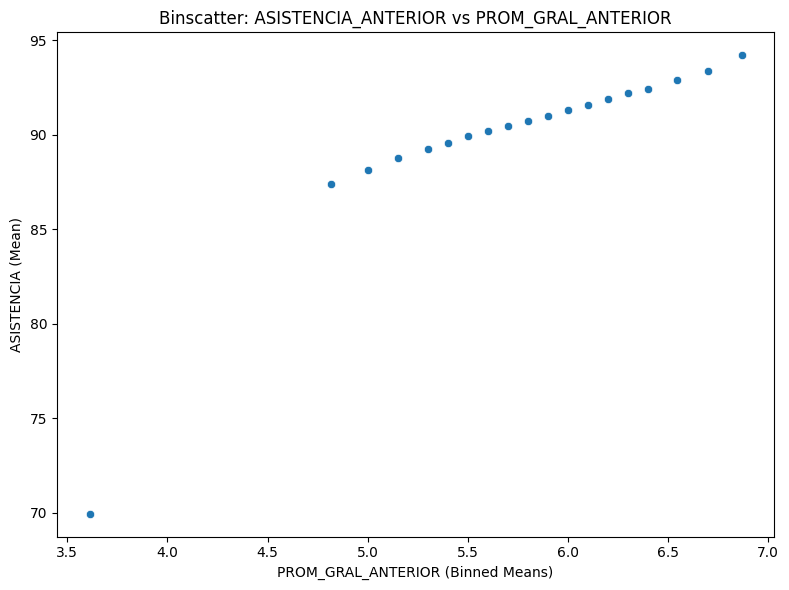

In [45]:
# Comprobamos si existen outliers en promedio con un scatterplot con bins agrupados
df['X_bin'] = pd.qcut(df['PROM_GRAL_ANTERIOR'], q=20, duplicates='drop')

binned = df.groupby('X_bin', observed=True).agg({'PROM_GRAL_ANTERIOR': 'mean','ASISTENCIA_ANTERIOR': 'mean'}).reset_index()

plt.figure(figsize=(8,6))
sns.scatterplot(data=binned, x='PROM_GRAL_ANTERIOR', y='ASISTENCIA_ANTERIOR')  # Use numeric PROM_GRAL
plt.xlabel('PROM_GRAL_ANTERIOR (Binned Means)')
plt.ylabel('ASISTENCIA (Mean)')
plt.title('Binscatter: ASISTENCIA_ANTERIOR vs PROM_GRAL_ANTERIOR')
plt.tight_layout()
plt.show()

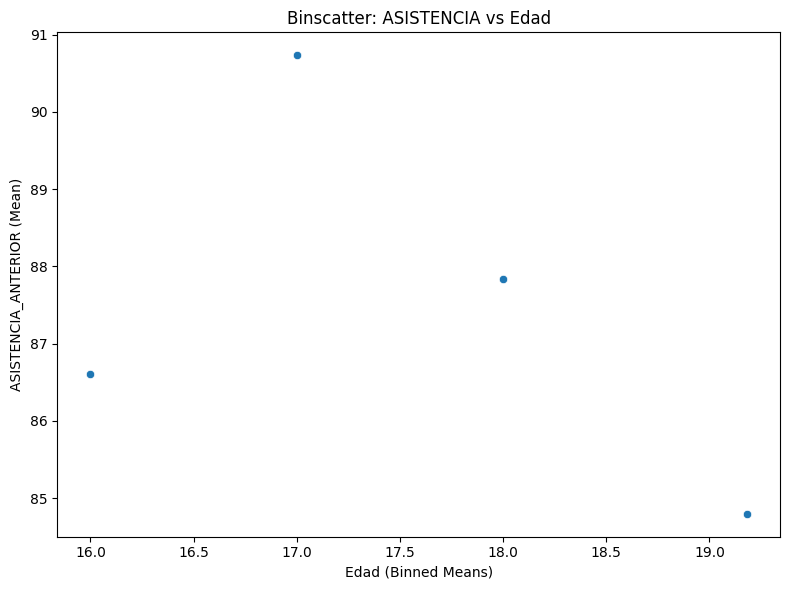

In [46]:
# Comprobamos si existen outliers en edad con un scatterplot con bins agrupados
df['A_bin'] = pd.qcut(df['EDAD_ALU'], q=20, duplicates='drop')  # 20 quantile bins

binned = df.groupby('A_bin', observed=True).agg({'EDAD_ALU': 'mean','ASISTENCIA_ANTERIOR': 'mean'}).reset_index()

plt.figure(figsize=(8,6))
sns.scatterplot(data=binned, x='EDAD_ALU', y='ASISTENCIA_ANTERIOR')  # Use numeric PROM_GRAL
plt.xlabel('Edad (Binned Means)')
plt.ylabel('ASISTENCIA_ANTERIOR (Mean)')
plt.title('Binscatter: ASISTENCIA vs Edad')
plt.tight_layout()
plt.show()

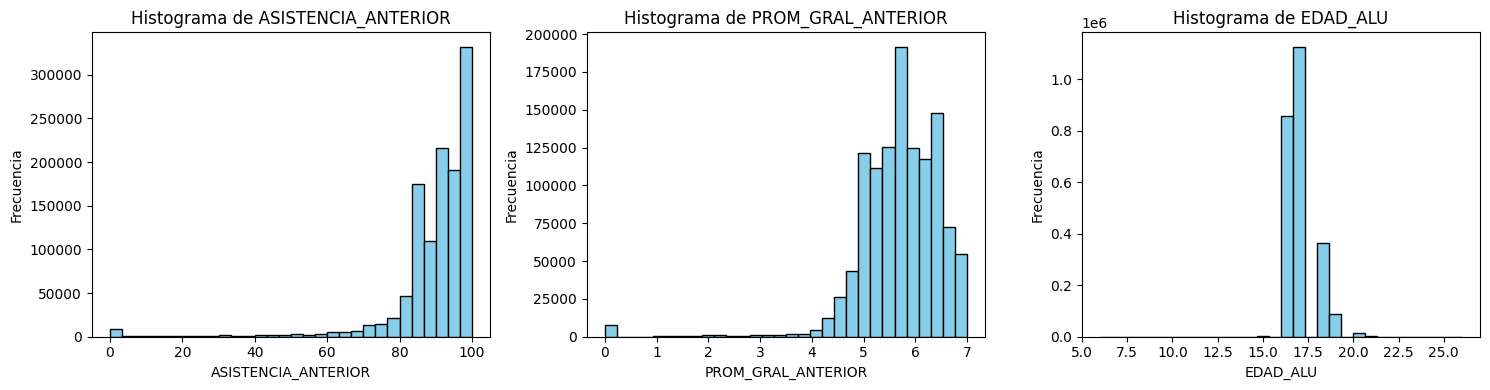

In [47]:
# Distribución de variables numericas
variables = ['ASISTENCIA_ANTERIOR', 'PROM_GRAL_ANTERIOR', 'EDAD_ALU']

plt.figure(figsize=(15, 4))

for i, var in enumerate(variables):
    plt.subplot(1, 3, i + 1)
    plt.hist(df[var].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

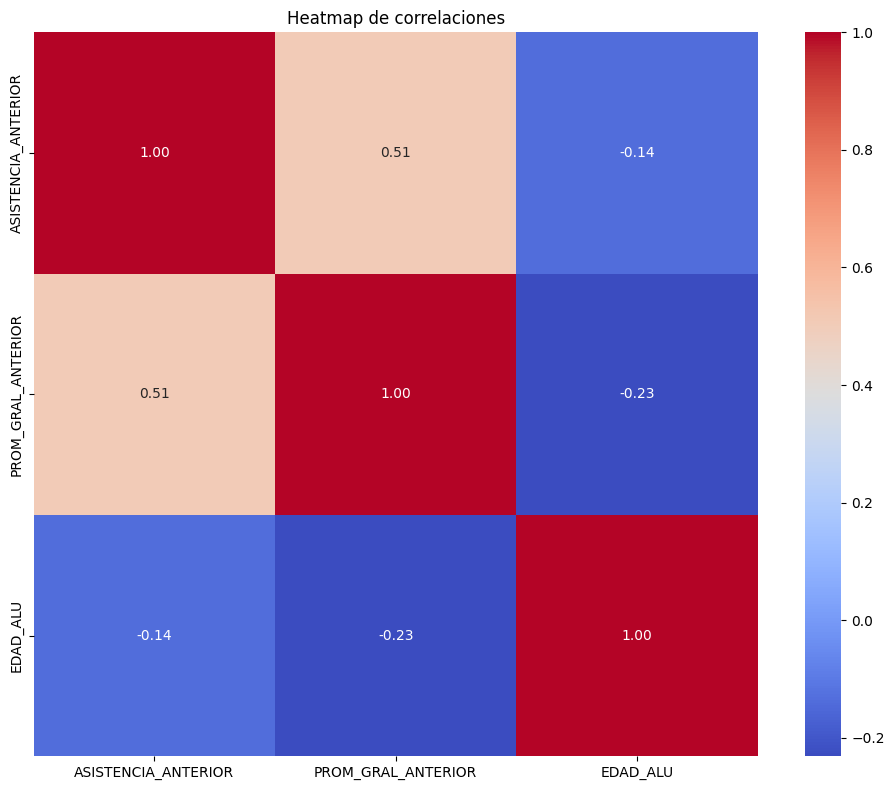

In [48]:
# Heatmap de correlaciones entre variables numericas
numericos = df[['ASISTENCIA_ANTERIOR', 'PROM_GRAL_ANTERIOR', 'EDAD_ALU']]

#Calcular correlaciones
corr = numericos.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Heatmap de correlaciones")
plt.tight_layout()
plt.show()

/tmp/ipython-input-49-3472897127.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_graph, x=var, palette='pastel', ax=ax)
/tmp/ipython-input-49-3472897127.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_graph, x=var, palette='pastel', ax=ax)
/tmp/ipython-input-49-3472897127.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_graph, x=var, palette='pastel', ax=ax)
/tmp/ipython-input-49-3472897127.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.

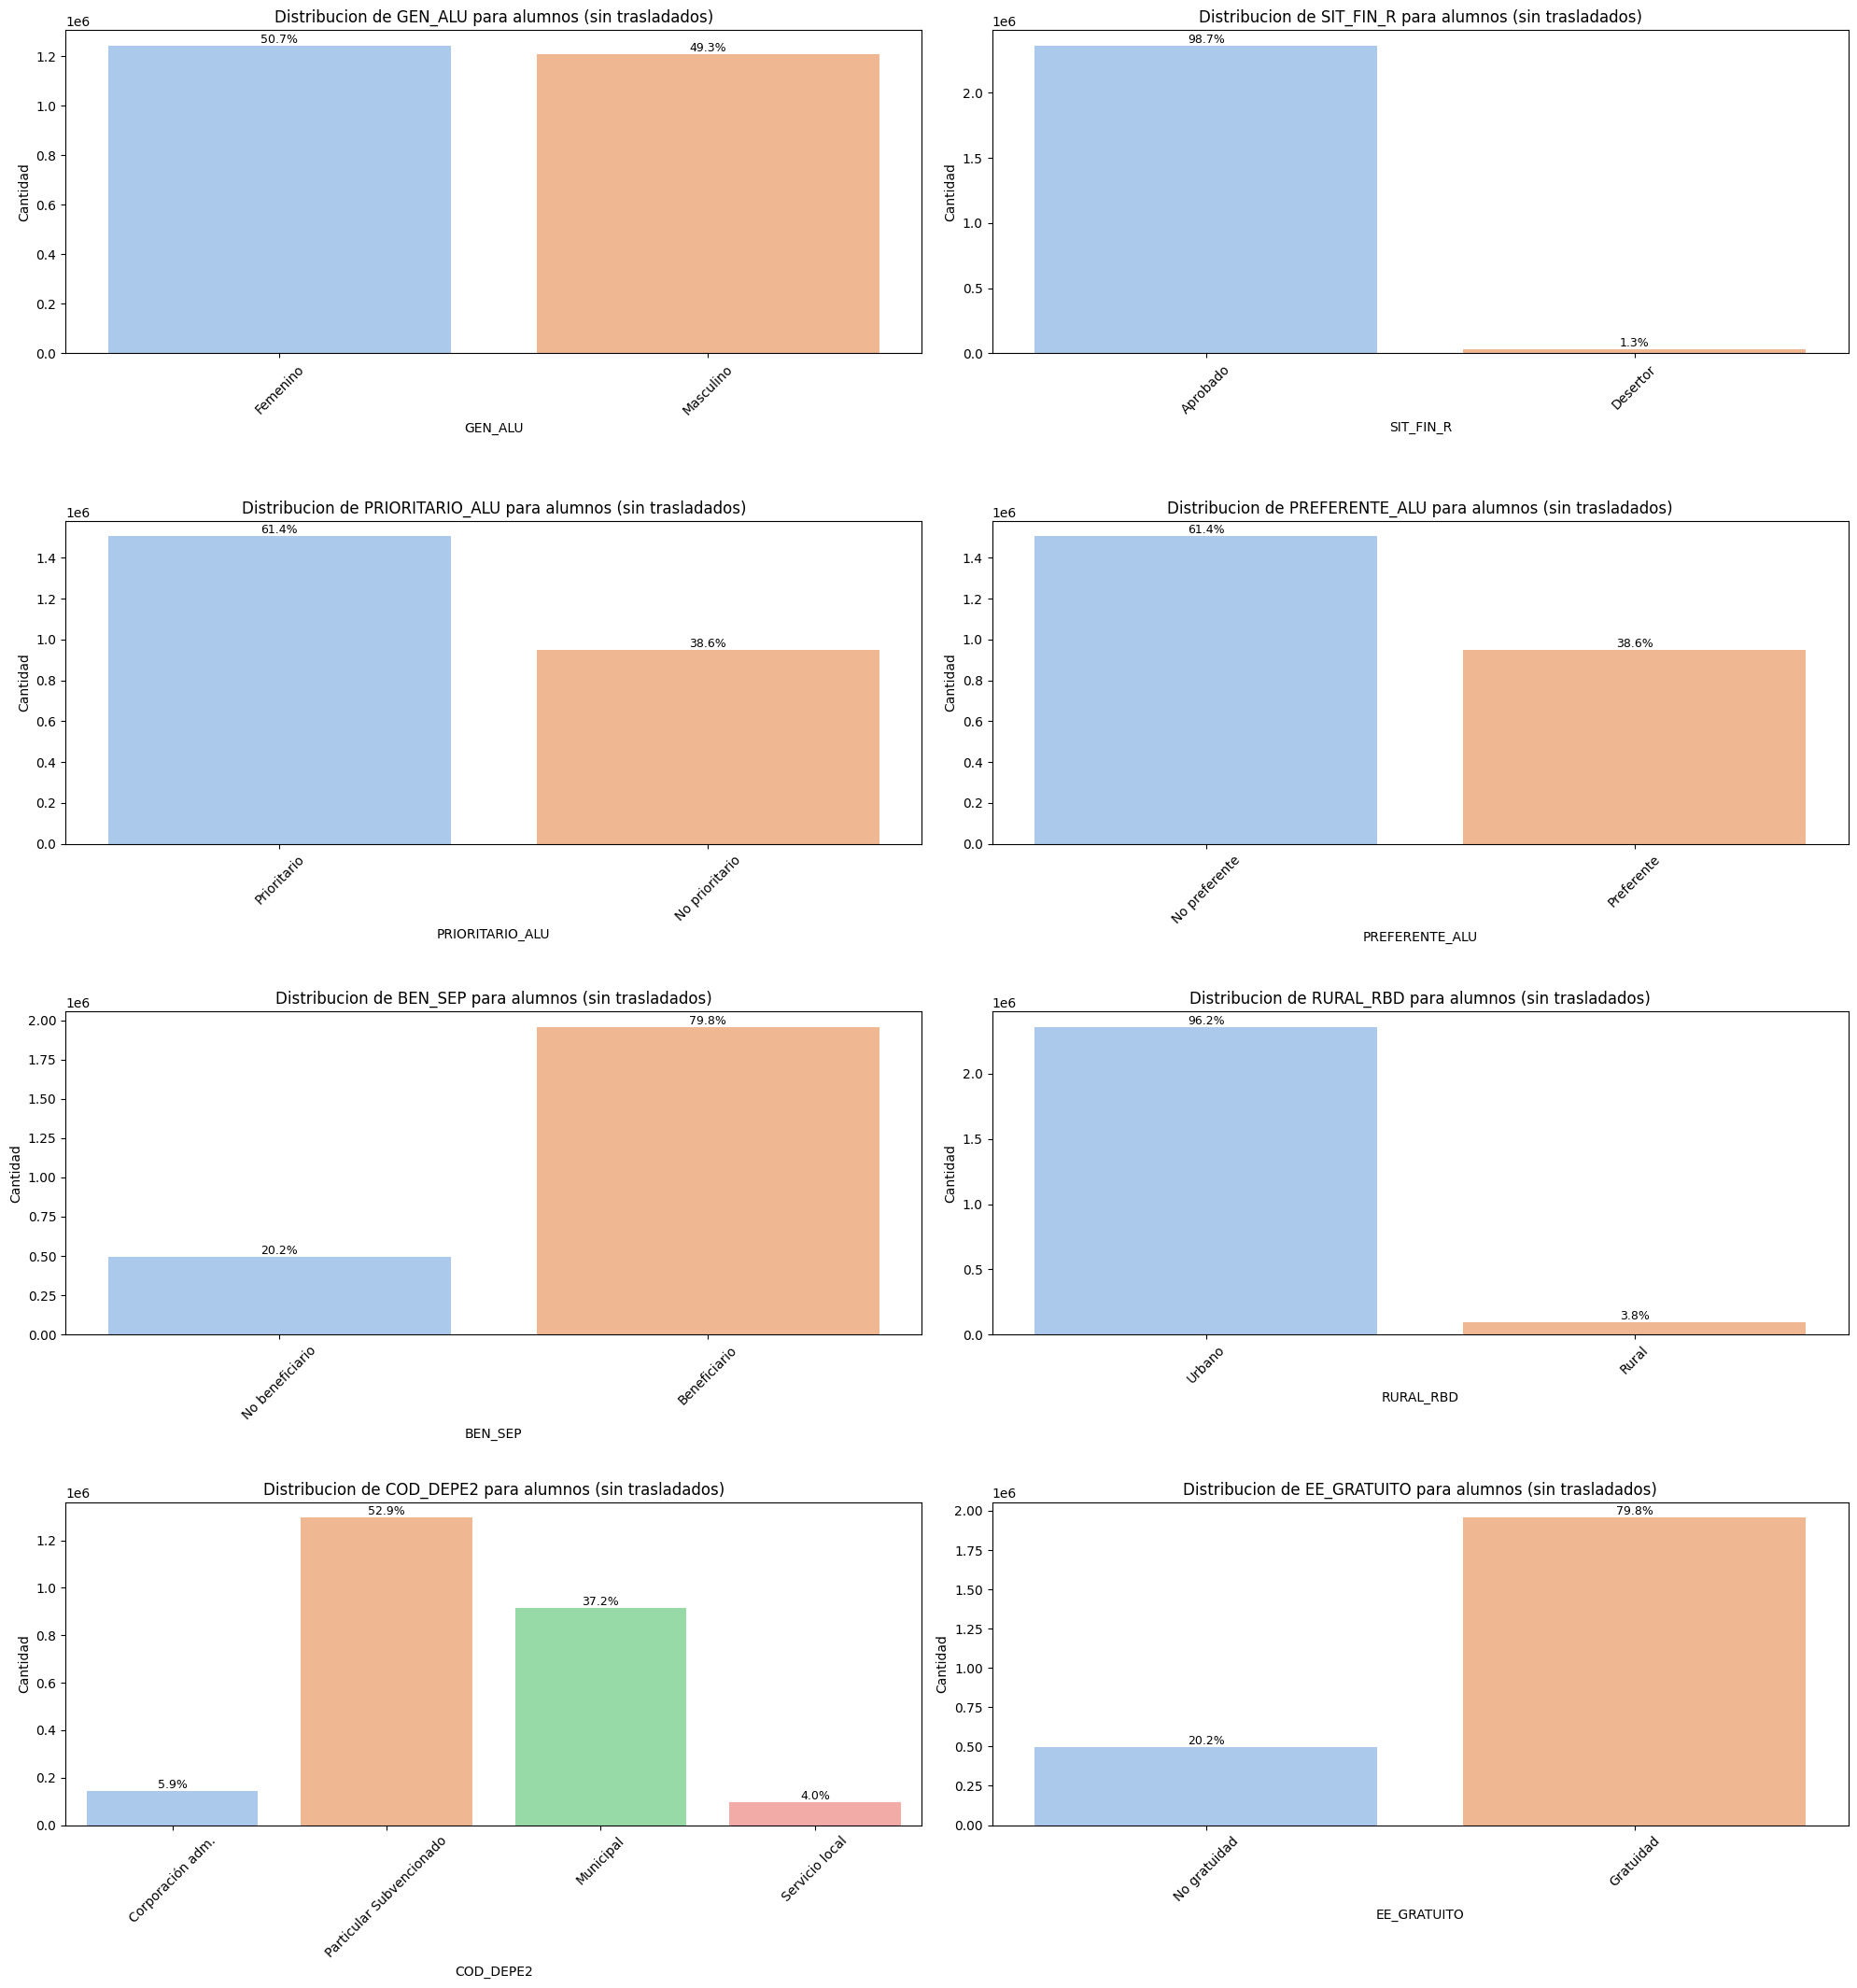

In [49]:
# Conteo de variables categoricas para aprobados (P) y desertores (Y)
categorias = ['GEN_ALU','SIT_FIN_R','PRIORITARIO_ALU', 'PREFERENTE_ALU',
              'BEN_SEP', 'RURAL_RBD', 'COD_DEPE2', 'EE_GRATUITO']

df_graph = df.assign(SIT_FIN_R = df['SIT_FIN_R'].map({'P': 'Aprobado', 'Y': 'Desertor'}),
    GEN_ALU = df['GEN_ALU'].map({1: 'Masculino', 2: 'Femenino'}),
    PRIORITARIO_ALU = df['PRIORITARIO_ALU'].map({1: 'Prioritario', 0: 'No prioritario'}),
    PREFERENTE_ALU = df['PREFERENTE_ALU'].map({1: 'Preferente', 0: 'No preferente'}),
    BEN_SEP = df['BEN_SEP'].map({1: 'Beneficiario', 0: 'No beneficiario'}),
    RURAL_RBD = df['RURAL_RBD'].map({1: 'Rural', 0: 'Urbano'}),
    COD_DEPE2 = df['COD_DEPE2'].map({1: 'Municipal', 2: 'Particular Subvencionado', 4: 'Corporación adm.', 5: 'Servicio local'}),
    EE_GRATUITO = df['EE_GRATUITO'].map({1: 'Gratuidad', 0: 'No gratuidad'}))

plt.figure(figsize=(20, 25))

for i, var in enumerate(categorias):
    ax = plt.subplot(5, 2, i + 1)
    sns.countplot(data=df_graph, x=var, palette='pastel', ax=ax)
    ax.set_title(f'Distribucion de {var} para alumnos (sin trasladados)')
    ax.set_xlabel(var)
    ax.set_ylabel("Cantidad")
    ax.tick_params(axis='x', rotation=45)

    total = df_graph[var].notna().sum()

    # Annotate each bar with % of total
    for patch in ax.patches:
        count = patch.get_height()
        if count > 0:
            pct = 100 * count / total
            ax.annotate(f'{pct:.1f}%',
                        (patch.get_x() + patch.get_width() / 2, count),
                        ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

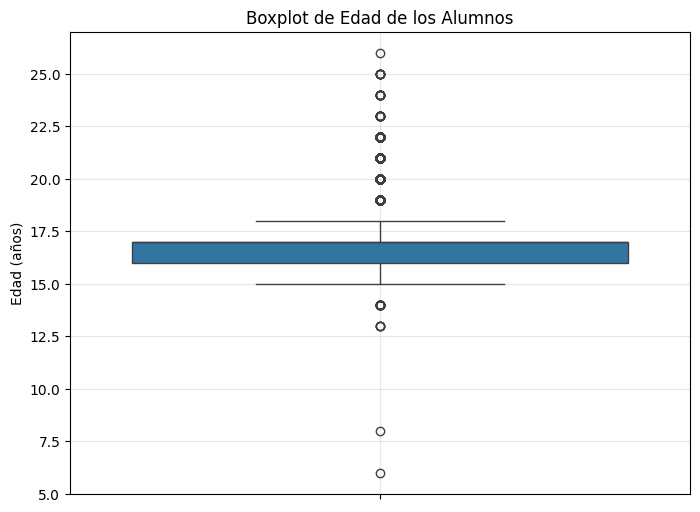

In [50]:
# Boxplot de edad
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='EDAD_ALU')
plt.title('Boxplot de Edad de los Alumnos')
plt.ylabel('Edad (años)')
plt.grid(True, alpha=0.3)
plt.show()

# 3. Feature Engineering <a name="seccion3"></a>
Incluir en esta sección:
- Transformaciones necesarias tanto de atributos como target para su ingesta por parte de algoritmos ML:
    - Estandarización y escalado
    - Bucketization
    - One-hot encoding
    - Técnicas de reducción de dimensionalidad

## **Tratamiento de missings**

Dado que son pocas observaciones las que cuenta con missing values, se optó por eliminarlas.

In [51]:
# Verificar missings en variables y presentar % de missings
missing_analysis = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100


missing_df = pd.DataFrame({
    'Variable': missing_analysis.index,
    'Missing_Count': missing_analysis.values,
    'Missing_Percentage': missing_percentage.values
})

# Mostrar solo variables con missings
variables_con_missing = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(variables_con_missing)

               Variable  Missing_Count  Missing_Percentage
13   PROM_GRAL_ANTERIOR        1280962           52.225820
20                X_bin        1280962           52.225820
14  ASISTENCIA_ANTERIOR        1280962           52.225820
8              EDAD_ALU              3            0.000122
21                A_bin              3            0.000122


In [52]:
# Eliminando filas con missing en EDAD_ALU
df = df.dropna(subset=['EDAD_ALU'])

# Eliminando filas con missing en A_bin
df = df.dropna(subset=['A_bin'])

# Eliminando filas con missing promedio del año anterior
df = df.dropna(subset=['PROM_GRAL_ANTERIOR'])

## **Tratamiento de outliers**

In [53]:
variables_categoricas = ['COD_COM_RBD', 'COD_DEPE2', 'COD_ENSE', 'COD_GRADO', 'COD_COM_ALU']
variables_binarias = ['RURAL_RBD', 'GEN_ALU', 'EE_GRATUITO', 'PRIORITARIO_ALU', 'PREFERENTE_ALU', 'BEN_SEP', 'DESERTAR']
variables_identificadores = ['MRUN']
variables_temporales = ['AGNO']
variables_continuas = ['EDAD_ALU', 'PROM_GRAL_ANTERIOR', 'ASISTENCIA']

# Revisando variables continuas
for var in variables_continuas:
    if var in df.columns:
        print(f"\n{var}:")

        if var == 'EDAD_ALU':
            print(f"  Rango: {df[var].min()}-{df[var].max()} años")
            print(f"  Edades < 12: {len(df[df[var] < 12])}")
            print(f"  Edades > 25: {len(df[df[var] > 25])}")

        elif var == 'PROM_GRAL_ANTERIOR':
            print(f"  Rango: {df[var].min()}-{df[var].max()}")
            print(f"  Notas = 0: {len(df[df[var] == 0])}")
            print(f"  Notas > 7: {len(df[df[var] > 7])}")

        elif var == 'ASISTENCIA':
            print(f"  Rango: {df[var].min()}-{df[var].max()}%")
            print(f"  Valores < 0: {len(df[df[var] < 0])}")
            print(f"  Valores > 100: {len(df[df[var] > 100])}")


EDAD_ALU:
  Rango: 14.0-26.0 años
  Edades < 12: 0
  Edades > 25: 1

PROM_GRAL_ANTERIOR:
  Rango: 0.0-7.0
  Notas = 0: 7464
  Notas > 7: 0

ASISTENCIA:
  Rango: 0-100%
  Valores < 0: 0
  Valores > 100: 0


Se mantendra sin cambios a ASISTENCIA (rango 0-100% es normal) y a PROM_GRAL_ANTERIOR (0=retirado, 1-7=escala de notas)

In [54]:
# Para EDAD_ALU se elimina menores de 12 años
df = df[df['EDAD_ALU'] >= 12]  # Se elimino a 2 estudiantes

## **Otros ajustes**

In [55]:
# Limpieza de la variable GEN_ALU

# Mostrando distribucion actual
df['GEN_ALU'].value_counts().sort_index()

# Eliminar observaciones con GEN_ALU = 0
filas_antes = len(df)
df = df[df['GEN_ALU'] != 0]
filas_despues = len(df)
print(f"Eliminadas {filas_antes - filas_despues} observaciones con genero indeterminado")

Eliminadas 2 observaciones con genero indeterminado


In [56]:
# Creando variable dummy: 1 = Mujer, 0 = Varon
df['MUJER'] = (df['GEN_ALU'] == 1).astype(int)

# Creando variable dummy: 1 si alumno estudia en misma comuna que reside, 0 si no
df['MISMA_COMUNA'] = (df['COD_COM_RBD'] == df['COD_COM_ALU']).astype(int)

# Creando dummy pandemia: 1 si fue 2020 o 2021, 0 si no
df['DUMMY_PANDEMIA'] = ((df['AGNO'] == 2020) | (df['AGNO'] == 2021)).astype(int)

# Creando dummy estallido: 1 si fue 2019, 0 si no
df['DUMMY_ESTALLIDO'] = (df['AGNO'] == 2019).astype(int)

/tmp/ipython-input-56-3935814355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MUJER'] = (df['GEN_ALU'] == 1).astype(int)
/tmp/ipython-input-56-3935814355.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MISMA_COMUNA'] = (df['COD_COM_RBD'] == df['COD_COM_ALU']).astype(int)
/tmp/ipython-input-56-3935814355.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [57]:
# Dropeamos variable SIT_FIN_R
df = df.drop(columns='SIT_FIN_R')

# Dropeamos variable GEN_ALU
df = df.drop(columns='GEN_ALU')

## **One Hot Encoding: Dependencia, tipo y grado**

In [58]:
# Unimos escuelas SLEP (COD_DEPE2 = 5) a municipales (COD_DEPE2 = 1)
df['COD_DEPE2'] = df['COD_DEPE2'].replace(5, 1)

# Verificando la distribución actual
print("Distribución actual de COD_DEPE2:")
print(df['COD_DEPE2'].value_counts().sort_index())

# Creando las variables dummy
dependencia_dummies = pd.get_dummies(df['COD_DEPE2'], prefix='DEPE')

# Mostrar las nuevas variables creadas
print("\nVariables dummy creadas:")
for col in dependencia_dummies.columns:
    print(f"  {col}")

# Agregando las dummies al dataset principal
df = pd.concat([df, dependencia_dummies], axis=1)

# Verificación de creación y conteo de 1s
for col in list(dependencia_dummies.columns):
    print(f"Procesando columna: {col} (tipo: {type(col)})")
    count_ones = df[col].sum()
    print(f"{col}: {count_ones:,} casos con valor 1")  # no int() conversion needed

Distribución actual de COD_DEPE2:
COD_DEPE2
1    482918
2    619261
4     69593
Name: count, dtype: int64

Variables dummy creadas:
  DEPE_1
  DEPE_2
  DEPE_4
Procesando columna: DEPE_1 (tipo: <class 'str'>)
DEPE_1: 482,918 casos con valor 1
Procesando columna: DEPE_2 (tipo: <class 'str'>)
DEPE_2: 619,261 casos con valor 1
Procesando columna: DEPE_4 (tipo: <class 'str'>)
DEPE_4: 69,593 casos con valor 1


In [59]:
# Dropeamos variable COD_DEPE2
df = df.drop(columns='COD_DEPE2')

## **Target Encoding: Comunas**

In [60]:
# Variable objetivo
target_var = 'DESERTAR'

# Viendo cuantas comunas diferentes existen
n_comunas = df['COD_COM_RBD'].nunique()
print(f"Numero de comunas diferentes: {n_comunas:,}")

# Calculando target encoding
target_encoding = df.groupby('COD_COM_RBD')[target_var].agg(['mean', 'count']).reset_index()
target_encoding.columns = ['COD_COM_RBD', 'COMUNA_TARGET_RATE', 'COMUNA_COUNT']

# Aplicando suavizado (smoothing) para comunas con pocos casos
# Formula: (count * target_rate + alpha * global_rate) / (count + alpha)
global_rate = df[target_var].mean()
alpha = 10  # Factor de suavizado

target_encoding['COMUNA_TARGET_SMOOTH'] = (
   (target_encoding['COMUNA_COUNT'] * target_encoding['COMUNA_TARGET_RATE'] +
    alpha * global_rate) /
   (target_encoding['COMUNA_COUNT'] + alpha)
)

# Haciendo merge con el dataset principal
df = df.merge(target_encoding[['COD_COM_RBD', 'COMUNA_TARGET_SMOOTH']],
             on='COD_COM_RBD', how='left')

# Verificar resultados
print(f"Variable creada: COMUNA_TARGET_SMOOTH")
print(f"Rango de valores: {df['COMUNA_TARGET_SMOOTH'].min():.4f} - {df['COMUNA_TARGET_SMOOTH'].max():.4f}")
print(f"Promedio global: {global_rate:.4f}")
print(f"Comunas procesadas: {len(target_encoding)}")

Numero de comunas diferentes: 352
Variable creada: COMUNA_TARGET_SMOOTH
Rango de valores: 0.0002 - 0.0598
Promedio global: 0.0101
Comunas procesadas: 352


## **Bucketización: Tipo de enseñanza**

In [61]:
def map_cod_ense(cod_ense):
    # Mapeo basado en el sistema educativo chileno
    cientifico_humanista = [310, 363]
    tecnico_profesional = [410, 463, 510, 563, 610, 663, 710, 763, 810, 863, 910]

    if cod_ense in cientifico_humanista:
        return 'Científico Humanista'
    elif cod_ense in tecnico_profesional:
        return 'Técnico Profesional'
    else:
        return np.nan  # Para valores no mapeados

# Aplicar el mapeo
df['TIPO_ENSENANZA'] = df['COD_ENSE'].apply(map_cod_ense)

# Verificar valores únicos en TIPO_ENSENANZA
print("Valores únicos en TIPO_ENSENANZA:", df['TIPO_ENSENANZA'].unique())
print("Valores nulos en TIPO_ENSENANZA:", df['TIPO_ENSENANZA'].isna().sum())

Valores únicos en TIPO_ENSENANZA: ['Técnico Profesional' 'Científico Humanista']
Valores nulos en TIPO_ENSENANZA: 0


In [62]:
# One-hot encoding de TIPO_ENSENANZA
df = pd.get_dummies(df, columns=['TIPO_ENSENANZA'], prefix='ENSE', dtype=int)

# Mostrar las primeras filas para verificar
print(df[['MRUN', 'AGNO', 'COD_ENSE', 'PROM_GRAL', 'PROM_GRAL_ANTERIOR',
          'ENSE_Científico Humanista', 'ENSE_Técnico Profesional']].head(10))

# Imprimir número de filas para depuración
print(f"Filas en df después del merge y one-hot encoding: {len(df)}")

   MRUN  AGNO  COD_ENSE  PROM_GRAL  PROM_GRAL_ANTERIOR  \
0    17  2017       610        6.4                 5.9   
1    19  2017       610        6.2                 5.7   
2    86  2023       610        5.3                 5.6   
3    87  2022       310        6.2                 5.5   
4    98  2020       310        5.1                 4.8   
5    99  2020       510        6.7                 6.5   
6   122  2021       410        5.9                 6.2   
7   123  2022       310        5.7                 6.1   
8   136  2019       510        6.0                 5.9   
9   137  2019       510        5.0                 5.4   

   ENSE_Científico Humanista  ENSE_Técnico Profesional  
0                          0                         1  
1                          0                         1  
2                          0                         1  
3                          1                         0  
4                          1                         0  
5                  

In [63]:
# One-hot encoding de COD_GRADO
df = pd.get_dummies(df, columns=['COD_GRADO'], prefix='GRADO', dtype=int)

# Mostrar las primeras filas para verificar las nuevas columnas
print(df[['MRUN', 'AGNO', 'PROM_GRAL', 'GRADO_3', 'GRADO_4']].head(10))

   MRUN  AGNO  PROM_GRAL  GRADO_3  GRADO_4
0    17  2017        6.4        0        1
1    19  2017        6.2        0        1
2    86  2023        5.3        0        1
3    87  2022        6.2        0        1
4    98  2020        5.1        0        1
5    99  2020        6.7        0        1
6   122  2021        5.9        0        1
7   123  2022        5.7        0        1
8   136  2019        6.0        0        1
9   137  2019        5.0        0        1


In [64]:
# Dropeamos variable COD_ENSE
df = df.drop(columns='COD_ENSE')

# 4. Entrenamiento <a name="seccion4"></a>
Incluir en esta sección:
- Train/test split
- Balanceo de clases (si aplica)
- Definición de la(s) métrica(s) de perfomance que se utilizará(n)
- Grid search
- Entrenamiento de modelos

In [65]:
df = df.dropna(subset=['PROM_GRAL_ANTERIOR', 'ASISTENCIA_ANTERIOR'])
df = df.drop(columns=['X_bin', 'A_bin'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171772 entries, 0 to 1171771
Data columns (total 27 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   AGNO                       1171772 non-null  int64  
 1   COD_COM_RBD                1171772 non-null  int64  
 2   RURAL_RBD                  1171772 non-null  int64  
 3   MRUN                       1171772 non-null  int64  
 4   EDAD_ALU                   1171772 non-null  float64
 5   COD_COM_ALU                1171772 non-null  int64  
 6   PROM_GRAL                  1171772 non-null  float64
 7   ASISTENCIA                 1171772 non-null  int64  
 8   PROM_GRAL_ANTERIOR         1171772 non-null  float64
 9   ASISTENCIA_ANTERIOR        1171772 non-null  float64
 10  EE_GRATUITO                1171772 non-null  int64  
 11  PRIORITARIO_ALU            1171772 non-null  int64  
 12  PREFERENTE_ALU             1171772 non-null  int64  
 13  BEN_SEP     

In [66]:
# Variables a utilizar
x = df.drop(['DESERTAR', 'PROM_GRAL', 'MRUN', 'ASISTENCIA', 'GRADO_4', 'ENSE_Científico Humanista', 'PREFERENTE_ALU', 'AGNO', 'COD_COM_RBD', 'COD_COM_ALU'], axis=1)
y = df['DESERTAR']
x.info()
x.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171772 entries, 0 to 1171771
Data columns (total 17 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   RURAL_RBD                 1171772 non-null  int64  
 1   EDAD_ALU                  1171772 non-null  float64
 2   PROM_GRAL_ANTERIOR        1171772 non-null  float64
 3   ASISTENCIA_ANTERIOR       1171772 non-null  float64
 4   EE_GRATUITO               1171772 non-null  int64  
 5   PRIORITARIO_ALU           1171772 non-null  int64  
 6   BEN_SEP                   1171772 non-null  int64  
 7   MUJER                     1171772 non-null  int64  
 8   MISMA_COMUNA              1171772 non-null  int64  
 9   DUMMY_PANDEMIA            1171772 non-null  int64  
 10  DUMMY_ESTALLIDO           1171772 non-null  int64  
 11  DEPE_1                    1171772 non-null  bool   
 12  DEPE_2                    1171772 non-null  bool   
 13  DEPE_4                    1

,RURAL_RBD,EDAD_ALU,PROM_GRAL_ANTERIOR,ASISTENCIA_ANTERIOR,EE_GRATUITO,PRIORITARIO_ALU,BEN_SEP,MUJER,MISMA_COMUNA,DUMMY_PANDEMIA,DUMMY_ESTALLIDO,DEPE_1,DEPE_2,DEPE_4,COMUNA_TARGET_SMOOTH,ENSE_Técnico Profesional,GRADO_3
0,0,18.0,5.9,71.0,0,1,0,0,0,0,0,False,False,True,0.009974,1,0
1,0,17.0,5.7,100.0,1,1,1,0,1,0,0,False,True,False,0.011061,1,0
2,0,18.0,5.6,71.0,1,1,1,0,1,0,0,True,False,False,0.006473,1,0
3,0,17.0,5.5,74.0,0,0,0,1,1,0,0,False,True,False,0.011343,0,0
4,0,17.0,4.8,86.0,1,0,1,0,0,1,0,False,True,False,0.006532,0,0


In [67]:
# Split para entrenamiento y testeo
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 12)
x_train.shape, x_test.shape

((878829, 17), (292943, 17))

In [68]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from imblearn.over_sampling import SMOTE

cols_to_scale = ['EDAD_ALU', 'PROM_GRAL_ANTERIOR', 'ASISTENCIA_ANTERIOR', 'COMUNA_TARGET_SMOOTH']

# 1. Escalar variables continuas EN x_train
scaler = StandardScaler()
x_train_scaled = x_train.copy()
x_train_scaled[cols_to_scale] = scaler.fit_transform(x_train[cols_to_scale])

x_test_scaled = x_test.copy()
x_test_scaled[cols_to_scale] = scaler.transform(x_test[cols_to_scale])

# 2. Aplicar SMOTE sobre el train escalado
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train_scaled, y_train)

In [ ]:
# Convertir arrays a DataFrames
x_train_res_df = pd.DataFrame(x_train_res, columns=x.columns)
x_test_df = pd.DataFrame(x_test, columns=x.columns)

**En la próxima sección se evaluarán las siguientes métricas para ambos modelos:**

Accuracy

Precision

Recall

F1 score

ROC curve

AUC

In [69]:
# Cálculo de scale_pos_weight base

scale_pos_weight_base = (len(y_train) - sum(y_train)) / sum(y_train)
print(f"scale_pos_weight calculado: {scale_pos_weight_base:.2f}")

scale_pos_weight calculado: 98.31


In [70]:
import time
import numpy as np
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import (
    classification_report, f1_score, precision_score, recall_score,
    accuracy_score, roc_auc_score, precision_recall_curve,
    average_precision_score, make_scorer
)

# =======================
# Modelo base
# =======================
xgb = XGBClassifier(
    random_state=12,
    use_label_encoder=False,
    eval_metric='logloss',
    tree_method='hist'
)

# =======================
# Hiperparámetros
# =======================
param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1],
    "min_child_weight": [1, 3, 5],
    "subsample": [0.7, 0.85, 1.0],
    "colsample_bytree": [0.7, 0.85, 1.0],
    "gamma": [0, 1, 5],
    "scale_pos_weight": [scale_pos_weight_base, scale_pos_weight_base*1.5, scale_pos_weight_base*2]
}

scorer = make_scorer(average_precision_score)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)

# =======================
# Entrenamiento
# =======================
start_time = time.time()

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=25,  # puedes aumentar si tienes más recursos
    scoring=scorer,
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=12,
    error_score='raise'
)

random_search.fit(x_train, y_train)
best_model = random_search.best_estimator_
print("Mejores parámetros:", random_search.best_params_)

end_time = time.time()
tiempo_ejecucion_xgb = end_time - start_time

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:57:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores parámetros: {'subsample': 0.7, 'scale_pos_weight': 98.313933777828, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 0.85}


In [71]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

start_time = time.time()
# Grid search y estimación modelo Multilayer Perceptron
mlp = MLPClassifier(max_iter=100, random_state=42)

param_grid = {'hidden_layer_sizes': [(15,),(30,), (50,)],'activation': ['relu'],
    'solver': ['adam'], 'alpha': [0.001], 'learning_rate': ['adaptive']}

grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3,
   scoring='f1', verbose=2, n_jobs=-1)

grid_search.fit(x_train_res, y_train_res)

print("Best parameters found:")
print(grid_search.best_params_)

best_mlp = grid_search.best_estimator_
y_pred_mlp = best_mlp.predict(x_test_scaled)

print(classification_report(y_test, y_pred_mlp))
end_time = time.time()
tiempo_ejecucion_mlp = end_time - start_time
print(f"Tiempo de ejecución: {tiempo_ejecucion_mlp:.2f} segundos")

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters found:
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'solver': 'adam'}
              precision    recall  f1-score   support

           0       1.00      0.81      0.89    289999
           1       0.04      0.74      0.07      2944

    accuracy                           0.81    292943
   macro avg       0.52      0.77      0.48    292943
weighted avg       0.99      0.81      0.88    292943

Tiempo de ejecución: 1513.40 segundos


# 5. Evaluación <a name="seccion5"></a>
Incluir en esta sección:
- Métricas de performance de los mejores modelos encontrados a partir del grid search
- Tiempos de cómputo
- Matriz de confusión (si aplica)


=== Evaluación inicial (threshold = 0.5) ===
Mejores parámetros: {'subsample': 0.7, 'scale_pos_weight': 98.313933777828, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 0.85}
Accuracy entrenamiento: 0.8885
Accuracy testeo: 0.8819
Precision: 0.0515
Recall: 0.6175
F1 Score: 0.0951
AUC ROC: 0.8457
AUC PR: 0.1080
Tiempo de ejecución: 2091.62 segundos

>>> Umbral óptimo para F1: 0.88, F1: 0.1961
=== Métricas con umbral ajustado ===
Precision: 0.1657
Recall: 0.2401
F1 Score: 0.1961


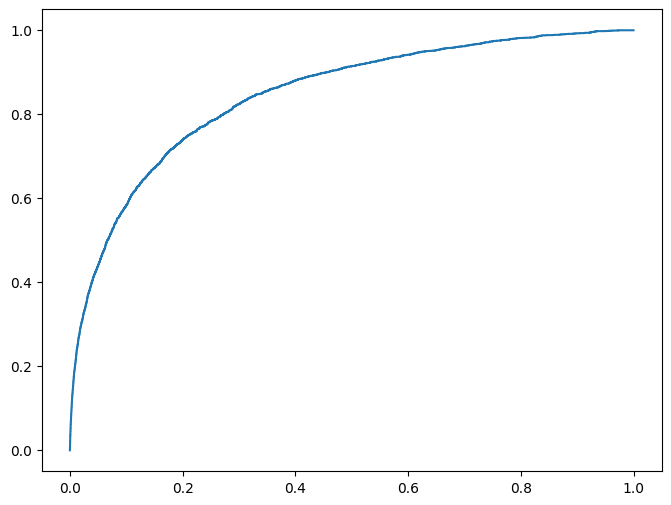

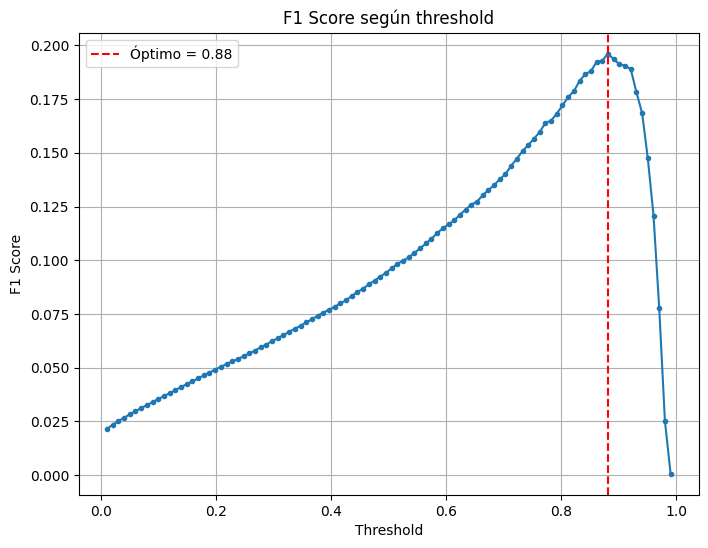

In [72]:
# Métricas para medir performance en XGBoost

from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

# =======================
# Evaluación base con threshold = 0.5
# =======================

# Predicciones de clase
y_pred = best_model.predict(x_test)
# Predicciones de probabilidad
y_proba = best_model.predict_proba(x_test)[:, 1]

# Accuracy
acc_train = accuracy_score(y_train, best_model.predict(x_train))
acc_test = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1 score
f1 = f1_score(y_test, y_pred)

# AUC ROC
fpr_xg, tpr_xg, _ = roc_curve(y_test, y_proba)
auc_xg = roc_auc_score(y_test, y_proba)

# Graficar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_xg, tpr_xg, label=f'XGBoost (AUC = {auc_xg:.2f})')

# AUC curva Precision-Recall
pr_auc = average_precision_score(y_test, y_proba)

print("\n=== Evaluación inicial (threshold = 0.5) ===")
print("Mejores parámetros:", random_search.best_params_)
print(f"Accuracy entrenamiento: {acc_train:.4f}")
print(f"Accuracy testeo: {acc_test:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC ROC: {auc_xg:.4f}")
print(f"AUC PR: {pr_auc:.4f}")
print(f"Tiempo de ejecución: {tiempo_ejecucion_xgb:.2f} segundos")

# =======================
# Threshold óptimo para F1
# =======================
from sklearn.metrics import f1_score

thresholds = np.linspace(0.01, 0.99, 100)
f1_scores = [f1_score(y_test, y_proba > thr) for thr in thresholds]

best_thr = thresholds[np.argmax(f1_scores)]
best_f1 = max(f1_scores)

y_pred_opt = (y_proba > best_thr).astype(int)
precision_opt = precision_score(y_test, y_pred_opt)
recall_opt = recall_score(y_test, y_pred_opt)
f1_opt = f1_score(y_test, y_pred_opt)

print(f"\n>>> Umbral óptimo para F1: {best_thr:.2f}, F1: {best_f1:.4f}")
print("=== Métricas con umbral ajustado ===")
print(f"Precision: {precision_opt:.4f}")
print(f"Recall: {recall_opt:.4f}")
print(f"F1 Score: {f1_opt:.4f}")

# =======================
# F1 vs Threshold
# =======================
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, marker='.')
plt.axvline(best_thr, color='red', linestyle='--', label=f'Óptimo = {best_thr:.2f}')
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score según threshold")
plt.legend()
plt.grid()
plt.show()

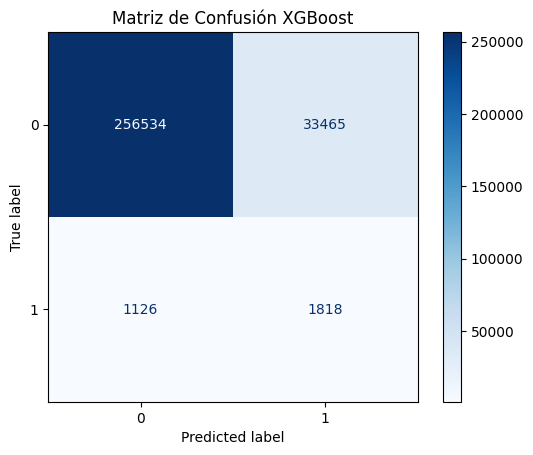

In [73]:
# Matriz de confusión para XGBoost
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Creamos la matriz y damos formato
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

# Gráficamos
plt.title("Matriz de Confusión XGBoost")
plt.show()


MLP Performance:
Accuracy Train: 0.8159
Accuracy Test: 0.8066
Precision: 0.0375
Recall: 0.7401
F1 Score: 0.0714


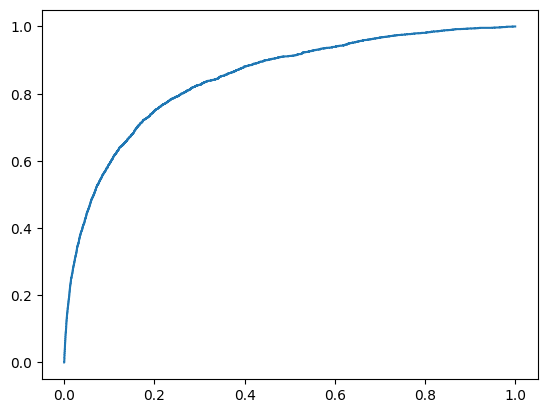

In [74]:
# Métricas para medir performance en MLP
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Accuracy
acc_mlp_train = accuracy_score(y_train_res, best_mlp.predict(x_train_res))
acc_mlp_test = accuracy_score(y_test, y_pred_mlp)

# Precision
precision_mlp = precision_score(y_test, y_pred_mlp)
# Recall
recall_mlp = recall_score(y_test, y_pred_mlp)
# F1
f1_mlp = f1_score(y_test, y_pred_mlp)

# Probabilidades predichas
y_proba_mlp = best_mlp.predict_proba(x_test_scaled)[:, 1]

# Cálculo ROC y AUC
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_proba_mlp)
auc_mlp = roc_auc_score(y_test, y_proba_mlp)

# Agregar curva ROC al mismo gráfico
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {auc_mlp:.2f})')

print("\nMLP Performance:")
print(f"Accuracy Train: {acc_mlp_train:.4f}")
print(f"Accuracy Test: {acc_mlp_test:.4f}")
print(f"Precision: {precision_mlp:.4f}")
print(f"Recall: {recall_mlp:.4f}")
print(f"F1 Score: {f1_mlp:.4f}")
#print(f"Tiempo de ejecución: {tiempo_ejecucion_mlp:.2f} segundos")

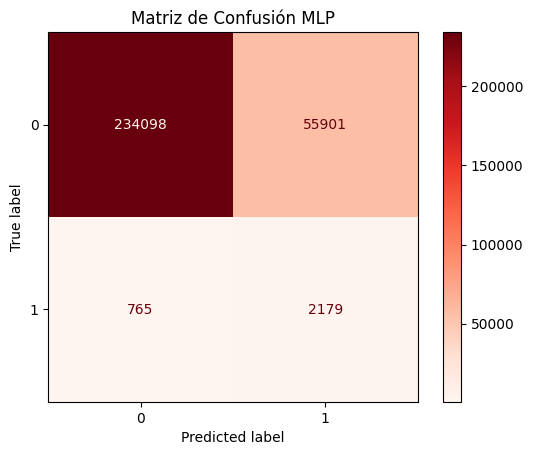

In [75]:
# Matriz de confusión para MLP
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Creamos la matriz y damos formato
cm = confusion_matrix(y_test, y_pred_mlp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')

# Gráficamos
plt.title("Matriz de Confusión MLP")
plt.show()

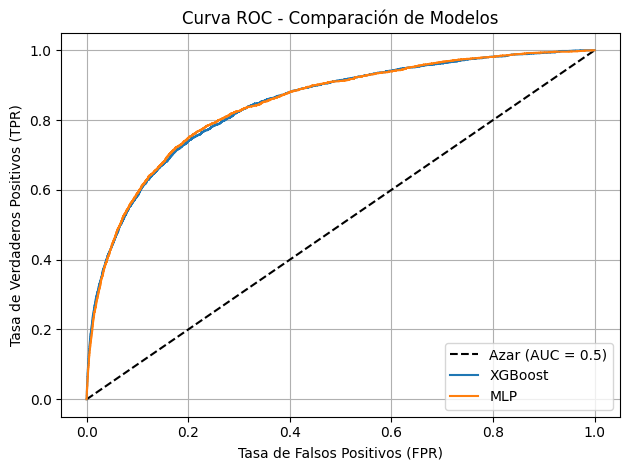

In [76]:
# Graficamos AUC para ambos
plt.plot([0, 1], [0, 1], 'k--', label='Azar (AUC = 0.5)')
plt.plot(fpr_xg, tpr_xg, label='XGBoost')
plt.plot(fpr_mlp, tpr_mlp, label='MLP')

plt.title('Curva ROC - Comparación de Modelos')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Explicabilidad e interpretabilidad <a name="seccion6"></a>
Incluir en esta sección:
- Importancia de los atributos
- Aplicación de métodos como SHAP values o LIME

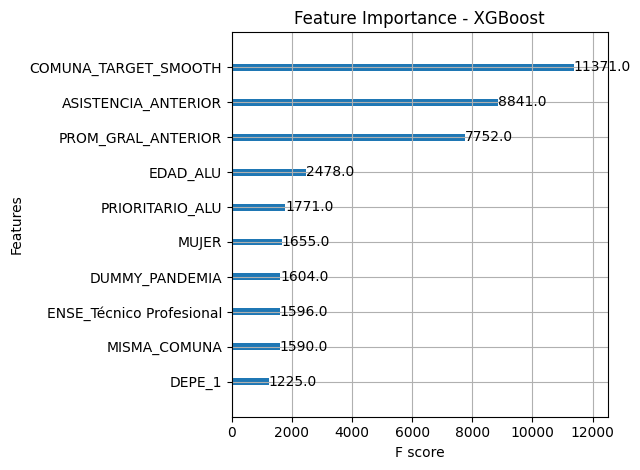

In [77]:
# Feature importance XGBoost
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Graficamos las 10 variables que más explican el resultado
plot_importance(best_model, max_num_features=10)
plt.title('Feature Importance - XGBoost')
plt.tight_layout()
plt.show()

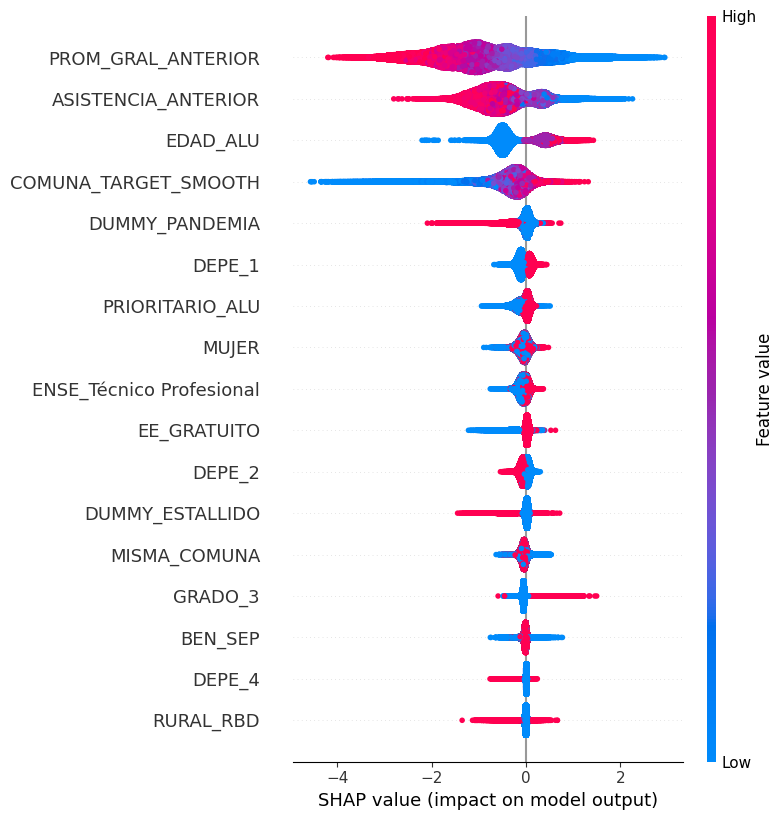

In [82]:
# SHAP para entender contribución de cada componente
import shap

# Explicador
explainer = shap.Explainer(best_model)
shap_values = explainer(x_test)

# Summary plot
shap.summary_plot(shap_values, x_test)

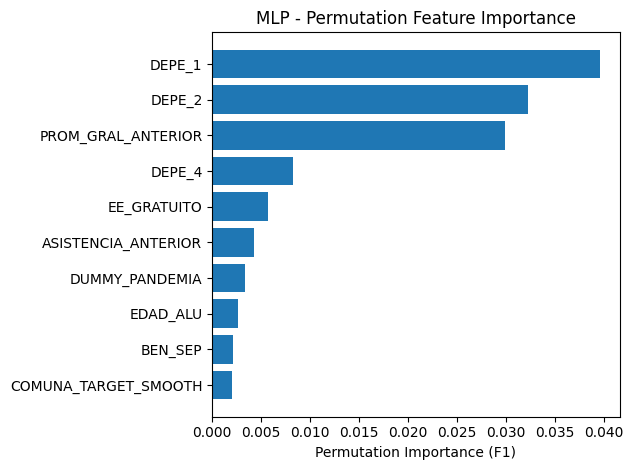

In [79]:
# Feature importance en MLP
from sklearn.inspection import permutation_importance

perm = permutation_importance(best_mlp, x_test_scaled, y_test, n_repeats=10, random_state=42, scoring='f1')

# Visualizar
sorted_idx = perm.importances_mean.argsort()[::-1]
plt.barh(x_train.columns[sorted_idx][:10], perm.importances_mean[sorted_idx][:10])
plt.xlabel("Permutation Importance (F1)")
plt.title("MLP - Permutation Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?it/s]

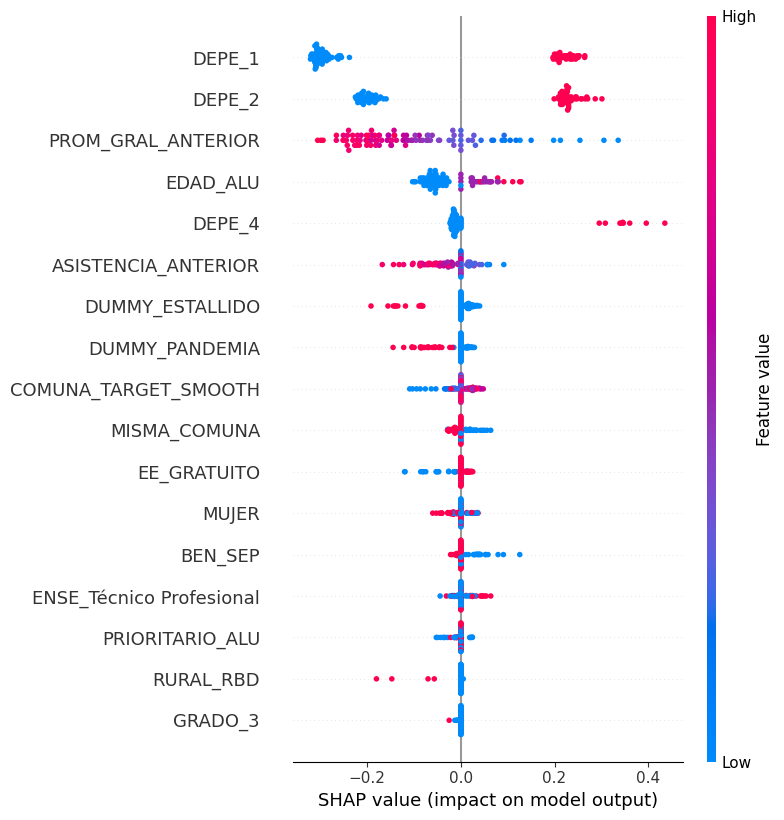

In [83]:
# SHAP para entender componentes más importantes en MLP
import shap
import pandas as pd
import warnings

# Paso 1: Wrapper para obtener solo la probabilidad de clase 1
def predict_class1_proba(X):
    return best_mlp.predict_proba(X)[:, 1]

# Paso 2: Crear DataFrames con nombres de columnas correctos
x_train_shap = pd.DataFrame(x_train_res, columns=x.columns)
x_test_shap = pd.DataFrame(x_test_scaled[:100], columns=x.columns)

# Paso 3: Crear el explainer (usando muestra del train)
explainer_mlp = shap.KernelExplainer(predict_class1_proba, shap.sample(x_train_shap, 100))

# Paso 4: Calcular SHAP values con warnings silenciados
with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        message="X does not have valid feature names, but MLPClassifier was fitted with feature names"
    )
    shap_values_mlp = explainer_mlp.shap_values(x_test_shap)

# Paso 5: Graficar
shap.summary_plot(shap_values_mlp, x_test_shap)